# What is Support Vector Machine?

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
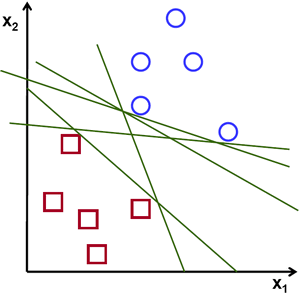 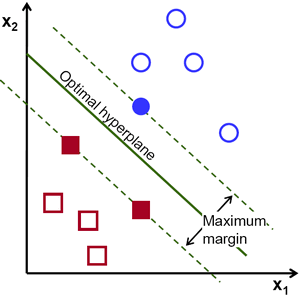

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.


# Hyperplanes in 2D and 3D feature space

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

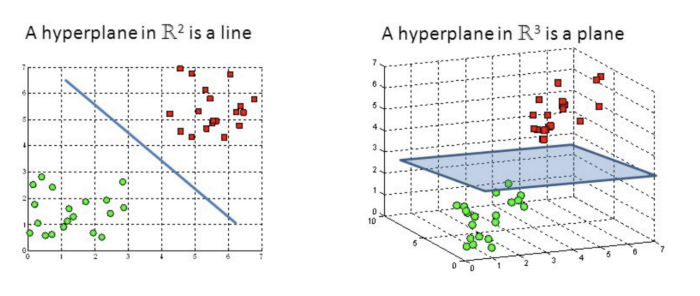

# Support Vectors

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.
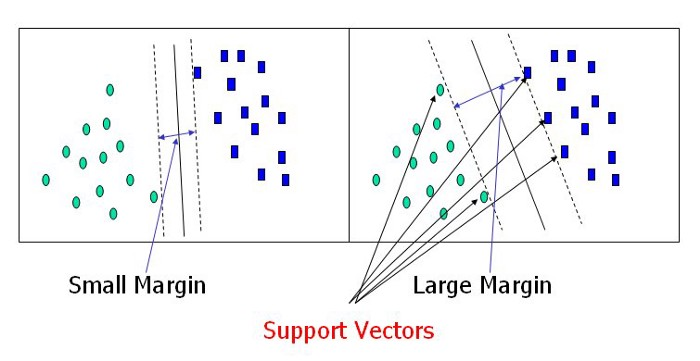

In [1]:
import pandas as pd

df=pd.read_csv('./datasets/original.csv')
df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [2]:
#number of missing values


df.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [3]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [4]:
features=df[["income","age","loan"]] #best contributors!
label=df[['default']]

In [5]:
features.isna().sum()

income    0
age       0
loan      0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,label, test_size=0.25,random_state=10)

In [7]:
from sklearn.svm import SVC #SVC

model= SVC()

In [8]:
model.fit(x_train, y_train)
model.score(x_train,y_train)

/home/harshit/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8530394121576487

In [9]:
predicted=pd.DataFrame( model.predict(x_test),columns=['Predicted Value'] )

In [10]:
y_test.reset_index(drop=True,inplace=True)
y_test

,default
0,0
1,0
2,0
3,1
4,0
...,...
495,0
496,0
497,0
498,0


In [11]:
ans=pd.concat([predicted, y_test],axis=1)
ans

,Predicted Value,default
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
495,0,0
496,0,0
497,0,0
498,0,0


In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(predicted, y_test)

0.874